# Análisis Cuantitativo - Proyecto de Predicción y Clasificación en la Industria Azucarera

Grupo conformado por:
- Juan Yustes.
- Andrés Fernández Daza.
- Miguel Jaramillo.
- Sebastián Correa.

A continuación se incorpora el diccionario compartido, que usaremos como guía para interpretar y validar variables durante el EDA:

- **Período** — Identificador del periodo o año de registro.  
- **Hacienda** — Código o identificador de la hacienda (finca o plantación).  
- **Nombre** — Denominación asignada a la unidad (campo/plantación/cultivo).  
- **Zona** — Región geográfica donde se ubica la hacienda o cultivo.  
- **Tenencia** — Forma de tenencia de la tierra (propiedad, arrendamiento, etc.).  
- **Suerte** — Identificador del lote específico dentro de la hacienda.  
- **Suelo** — Tipo de suelo (arenoso, arcilloso, etc.).  
- **Area Neta** — Área útil destinada al cultivo (ha o m²).  
- **Dist Km** — Distancia en km (p.ej., a la planta procesadora).  
- **Variedad** — Variedad del cultivo (tipo de caña).  
- **Cod.Estado # / Cod.Estado** — Códigos del estado del cultivo (numérico/texto).  
- **F.Siembra** — Fecha de siembra.  
- **Ult.Riego** — Fecha de último riego.  
- **Edad Ult Cos** — Edad del cultivo a la última cosecha.  
- **F.Ult.Corte** — Fecha del último corte/cosecha.  
- **Destino 1=Semilla** — Indicador del destino (semilla u otro).  
- **Cod. T.Cultivo / Cultivo** — Código y nombre del cultivo.  
- **Fec.Madur.** — Fecha de madurez.  
- **Producto** — Producto obtenido (jugo, azúcar, etc.).  
- **Dosis Madurante** — Dosis de insumo aplicado en maduración.  
- **Semanas mad.** — Semanas hasta la madurez.  
- **TonUltCorte** — Toneladas en el último corte.  
- **TCH / TCHM** — Toneladas de caña por hectárea (rendimiento).  
- **Ton.Azucar** — Toneladas de azúcar extraídas.  
- **Rdto** — Rendimiento general.  
- **TAH / TAHM** — Métricas relacionadas con toneladas de azúcar por hectárea.

**Recomendaciones generales del diccionario**: revisar nulos, decidir política de imputación o descarte, y crear variables derivadas cuando agreguen señal (p.ej. diferencias entre fechas, ratios por área, etc.).

## Carga de Datos y Librerías a Usar

**Para trabajar en Colab**

Se clona el repo y se accede a la rama dev con el fin de acceder a los datasets.

In [29]:
#!git clone https://github.com/Yustes1704/Analisis_Cuantitativo_Ingenio.git
#%cd Analisis_Cuantitativo_Ingenio
#!git checkout dev

Luego importemos todas las librerías de interés para este trabajo.

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.linear_model import LassoCV
from sklearn.ensemble import RandomForestRegressor
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.feature_selection import VarianceThreshold

Con esto, ya podremos importar nuestro dataset.

In [31]:
df = pd.read_excel('datasets/HISTORICO_SUERTES.xlsx')

## Análisis Exploratorio de Datos (EDA)

Empecemos revisando el tamaño de nuestro Dataframe

In [32]:
df.shape

(21027, 85)

Encontramos 21,027 Registros con 85 columnas. Ahora verifiquemos la estructura general del documento.

In [33]:
pd.set_option('display.max_columns', None)
df.head()

,Período,Hacienda,Nombre,Zona,Tenencia,Suerte,Suelo,Area Neta,Dist Km,Variedad,Cod.Estado #,Cod.Estado,F.Siembra,D.S.,Ult.Riego,Edad Ult Cos,F.Ult.Corte,Destino 1=Semilla,Cod. T.Cultivo,Cultivo,Fec.Madur.,Producto,Dosis Madurante,Semanas mad.,TonUltCorte,TCH,TCHM,Ton.Azucar,Rdto,TAH,TAHM,Sac.Caña Precosecha,Edad.Precosecha,%Sac.Caña,%Sac.Muestreadora,%ATR,KATRHM,%Fibra Caña,%AR Jugo,%ME Min,%ME Veg,%ME Tot,Brix,Pureza,Vejez,Tipo Quema,T.Corte,Cerca de,Cosechó,Num.Riegos,M3 Riego,DDUlt.Riego,Lluvias (2 Meses Ant.),Lluvias Ciclo,Lluvias 0 -3,Lluvias tres a seis,Lluvias seis a nueve,Luvias 9 -FC,%Infest.Diatrea,Fosfato Jugo,Fert.Nitrogen.,Urea 46%,MEZ,Boro Granul.,MicroZinc,NITO_XTEND,Sul.Amonio,NITRAX-S,Vinaza,Codigo Estacion,Temp. Media 0-3,Temp. Media Ciclo,Temp Max Ciclo,Temp Min Ciclo,Humedad Rel Media 0-3,Humedad Rel Media Ciclo,Oscilacion Temp Med 0-3,Oscilacion Temp Ciclo,Sum Oscilacion Temp Ciclo,Radicion Solar 0-3,Radiacion Solar Ciclo,Precipitacion 0_3,Precipitacion Ciclo,Evaporacion 0-3,Evaporacion Ciclo
0,201701,80493,LA CONCHA,IP02,51.0,002A,CANTARINA,6.00,4.3,CC85-92,5,Corte 5,2010-08-20,NaN,NaT,12.81,2017-01-02,0,1.0,Normal,2016-11-04,BONUS 250 EC REGULADOR FISIOLÓGICO,1.0,8.428571,727.19,121.198333,9.461228,86.050,11.8332,14.341666,1.119567,16.8172,NaN,13.7582,13.508,15.1653,1434.823641,16.910,0.84,0.355,10.198,10.553,15.7464,87.2241,2.735,VERDE,MECANIZADO,El Cerrito,AI08,NaN,0.0,0,258.0,1038.0,0.0,454.0,102.0,482.0,NaN,178.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,201701,81284,UKRANIA INCAUCA,IP05,81.0,039B,NaN,1.45,NaN,CC85-92,5,Corte 5,2011-01-27,NaN,NaT,11.14,2017-01-02,0,1.0,Normal,NaT,NaN,0.0,NaN,136.00,93.793103,8.419488,14.728,10.8294,10.157241,0.911781,NaN,NaN,12.8430,12.551,14.0410,1182.180399,16.936,0.55,2.298,7.273,9.571,15.2240,84.3602,73.823,Q.ACCIDENTAL,MANUAL,Candelaria,AI08,NaN,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,382.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,201701,80203,EL AMPARO SAA,IP05,31.0,007,CORINTIAS,8.24,23.0,CC01-1228,4,Corte 4,2011-10-25,1.65,2016-09-17,12.32,2017-01-02,0,1.0,Normal,2016-11-04,BONUS 250 EC REGULADOR FISIOLÓGICO,1.1,8.428571,1436.62,174.347087,14.151549,145.268,10.1117,17.629611,1.430974,14.7749,12.02,11.9364,11.940,13.1236,1857.192723,15.512,0.61,3.000,9.323,12.323,14.1130,84.4527,2.108,VERDE,MECANIZADO,Palmira,AI08,5.0,48513.6,107,246.0,1002.0,106.0,326.0,113.0,457.0,NaN,226.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,201701,81380,SAN JUDAS INCAUCA,IP05,82.0,013A,NaN,1.05,66.5,CC01-1940,2,Corte 2,2014-03-08,NaN,NaT,9.79,2017-01-02,0,1.0,Normal,NaT,NaN,0.0,NaN,143.63,136.790476,13.972469,13.517,9.4109,12.873333,1.314947,NaN,NaN,11.2770,10.931,12.4820,1744.043640,17.621,0.67,0.140,6.788,6.927,13.6350,82.7062,64.614,Q.ACCIDENTAL,MANUAL,Corinto,AI08,NaN,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,278.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,201701,80298,JAVA,IP06,31.0,025A,GALPON,4.53,17.0,RB73-2223,3,Corte 3,2013-01-10,1.65,NaT,11.53,2017-01-02,0,1.0,Normal,NaT,NaN,0.0,NaN,512.20,113.068432,9.806455,42.505,8.2985,9.383002,0.813790,16.7662,NaN,10.2160,10.294,11.6030,1137.843039,14.352,0.95,0.592,2.939,3.531,12.9760,78.7299,71.021,Q.ACCIDENTAL,MANUAL,Guacari,AI08,NaN,0.0,0,138.0,991.0,264.0,255.0,188.0,284.0,NaN,244.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Por un lado, observamos datos para la identificación de cultivos y para la caracterízación de estos cultivos. Por otra parte, encontramos también información de factores medioambientales y variables del cultivo (Como parámetros de rendimiento y fertilidad).

Observemos inicialmente cómo se distribuye nuestra variable temporal "Período"

In [34]:
Unicos_per= df.Período.unique()
print(Unicos_per)
print(f"Encontramos un total de {len(Unicos_per)} Periodos")

[201701 201704 201702 201703 201705 201706 201707 201708 201709 201710
 201711 201712 201801 201802 201803 201804 201805 201806 201807 201808
 201809 201810 201811 201812 201901 201902 201903 201904 201905 201906
 201907 201908 201909 201910 201911 201912 202001 202002 202003 202004
 202005 202006 202007 202008 202009 202010 202011 202012 202101 202102
 202103 202104 202105 202106 202107 202108 202109 202110 202111 202112
 202201 202202 202203 202204 202205 202206 202207 202208 202209 202210
 202211 202212 202301 202302 202303 202304 202305 202306 202307 202308
 202309 202310 202311 202312 202401 202402 202403 202404 202405 202406
 202407]
Encontramos un total de 91 Periodos


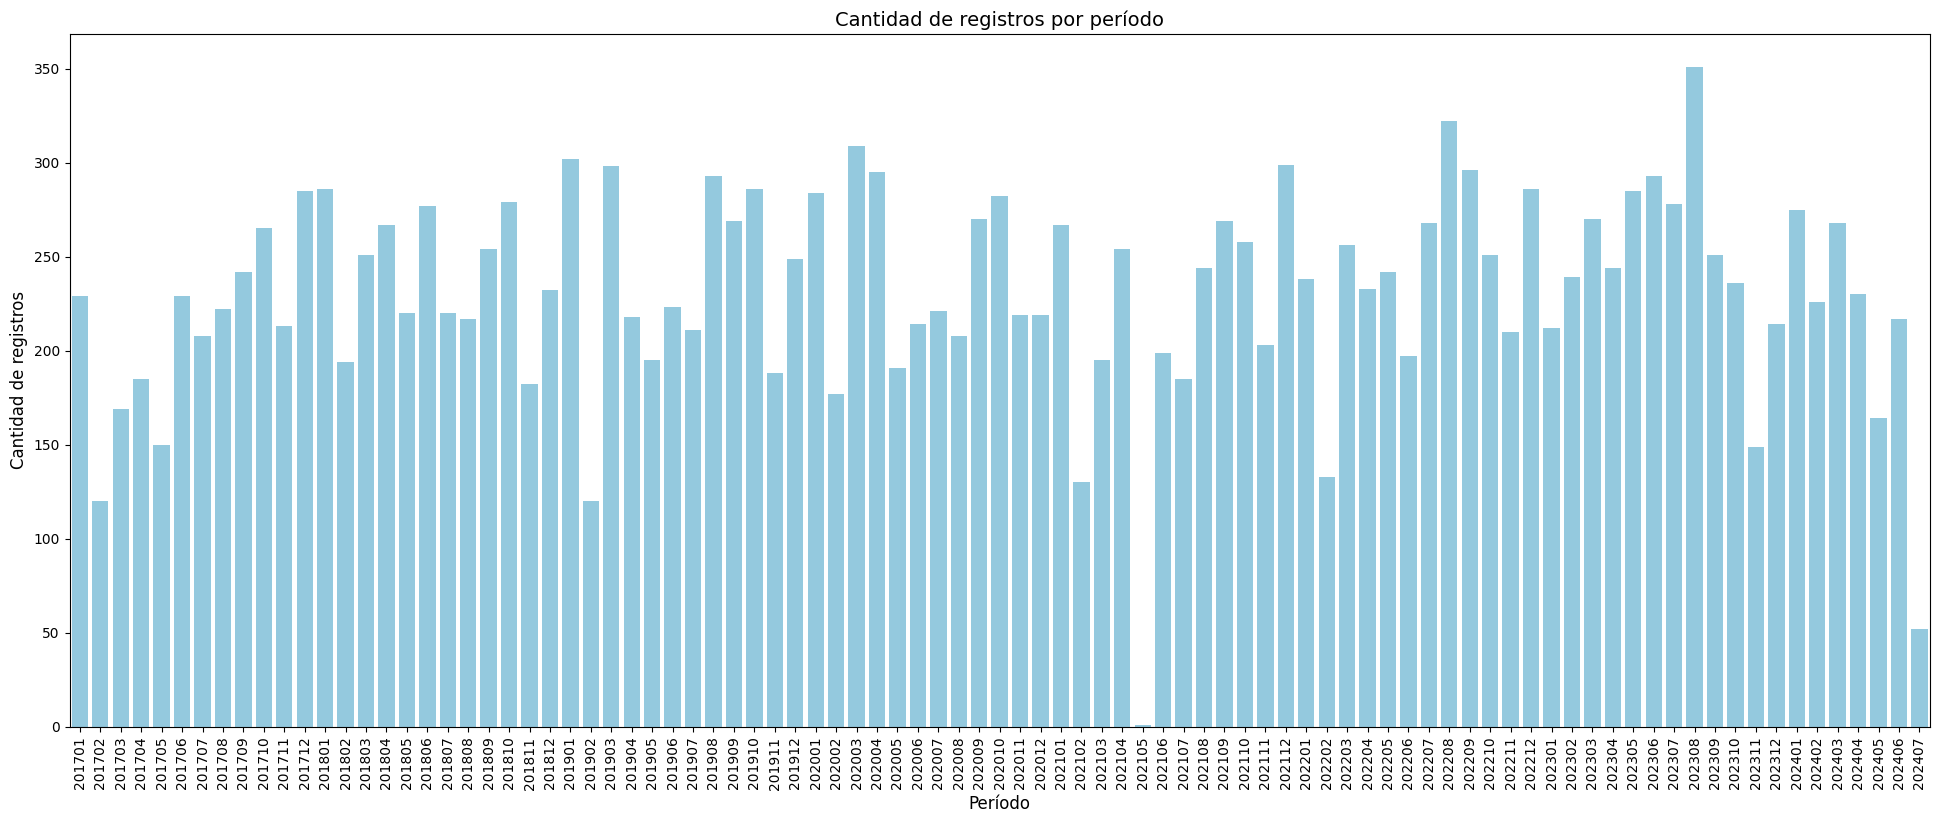

In [35]:
conteo_periodos = df['Período'].value_counts().sort_index()

# Gráfico de barras
plt.figure(figsize=(24,9))
sns.barplot(x=conteo_periodos.index, y=conteo_periodos.values, color="skyblue")

plt.title("Cantidad de registros por período", fontsize=14)
plt.xlabel("Período", fontsize=12)
plt.ylabel("Cantidad de registros", fontsize=12)
plt.xticks(rotation=90)
plt.show()


A simple vista encontramos que hay una tendencia a que los periodos terminados en 02 (Es decir, periodos de febrero en cada año) tengan una menor cantidad de registros. Adicionalmente, encontramos que en el periodo de 202105 hubo muy pocos registros y en el 202407 hubo también una disminución importante.

###Continuar aquí el análisis de algunas columnas importantes.

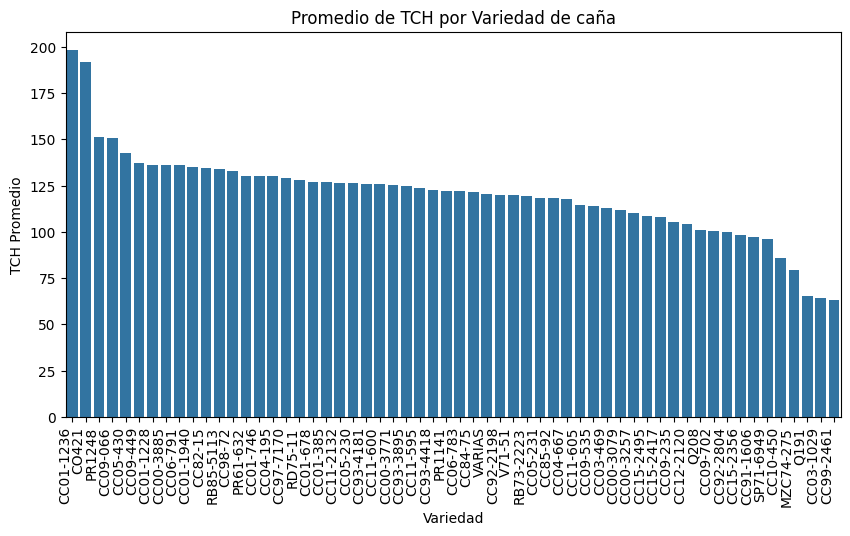

In [36]:
# Seleccionar solo las columnas de interés
cols_interes = ["Variedad", "Suelo", "Zona", "Tenencia", "Area Neta", "TCH"]
df_interes = df[cols_interes].copy()

# Análisis 1: Variedad vs TCH:
# Calculo el promedio de TCH por cada variedad de caña
var_tch = df_interes.groupby("Variedad")["TCH"].mean().sort_values(ascending=False)

# Gráfico de barras
plt.figure(figsize=(10,5))
sns.barplot(x=var_tch.index, y=var_tch.values)
plt.title("Promedio de TCH por Variedad de caña")
plt.xticks(rotation=90, ha="right")
plt.ylabel("TCH Promedio")
plt.show()

* **Variedad:** Se observan diferencias claras en el rendimiento TCH dependiendo de la variedad, algunas alcanzan promedios mucho más altos. Esto muestra que la elección de la semilla es clave para mejorar la productividad.

/tmp/ipython-input-1525295231.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=suelo_tch.index, y=suelo_tch.values, palette="magma")


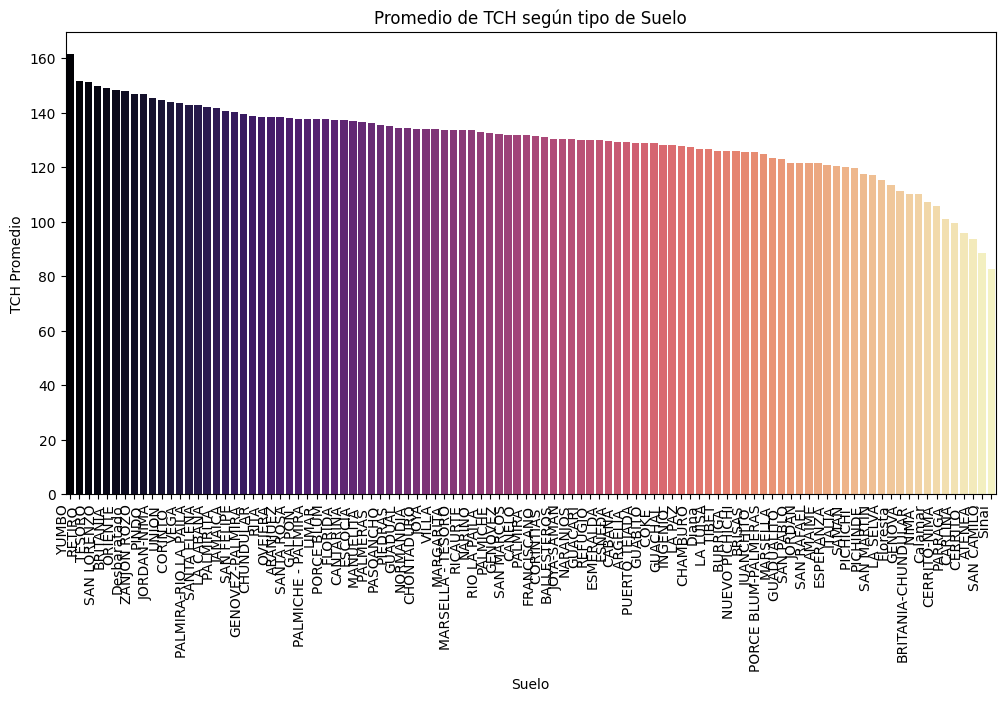

In [38]:
# Análisis 2: Suelo vs TCH
suelo_tch = df_interes.groupby("Suelo")["TCH"].mean().sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=suelo_tch.index, y=suelo_tch.values, palette="magma")
plt.title("Promedio de TCH según tipo de Suelo")
plt.xticks(rotation=90, ha="right")
plt.ylabel("TCH Promedio")
plt.xlabel("Suelo")
plt.show()

* **Suelo:** La gráfica muestra una gran variabilidad en el rendimiento según el tipo de suelo. Mientras que suelos como Yumbo superan las 160 TCH en promedio, otros como San Camilo no alcanzan las 90 TCH. Esta brecha confirma que la calidad y características del suelo influyen de manera decisiva en la productividad de la caña, y que no todos los terrenos ofrecen el mismo potencial.

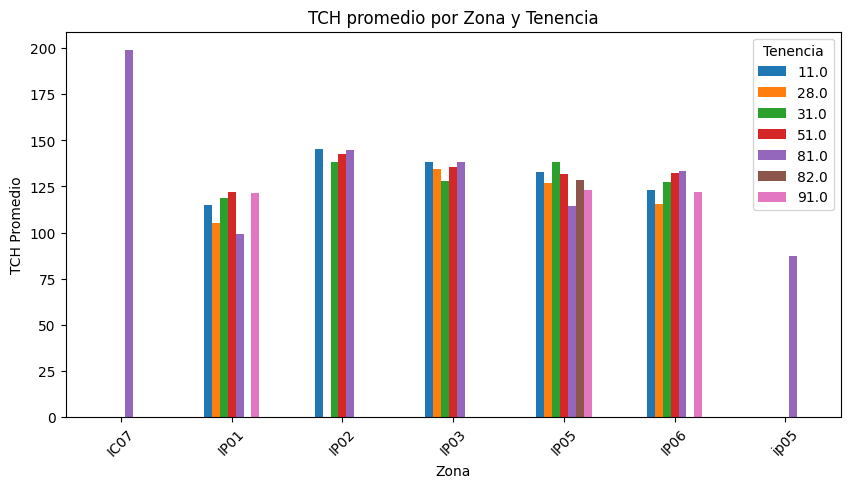

In [39]:
# Análisis 3: Zona y Tenencia:
# Veo cómo se comporta TCH según zona y tipo de tenencia de la tierra
zona_tenencia = df_interes.groupby(["Zona","Tenencia"])["TCH"].mean().unstack()

zona_tenencia.plot(kind="bar", figsize=(10,5))
plt.title("TCH promedio por Zona y Tenencia")
plt.ylabel("TCH Promedio")
plt.xticks(rotation=45)
plt.show()

* **Zona y Tenencia:** Hay variaciones entre zonas y según si la tierra es propia o arrendada. Esto puede relacionarse con la gestión agrícola que se da en cada contexto.

In [40]:
cols_drop = [
    "Hacienda", "Nombre", "Suerte",
    "Cod.Estado #", "Cod.Estado",
    "Producto", "Cerca de", "Codigo Estacion"
]

df = df.drop(columns=cols_drop)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21027 entries, 0 to 21026
Data columns (total 77 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Período                    21027 non-null  int64         
 1   Zona                       21027 non-null  object        
 2   Tenencia                   21026 non-null  float64       
 3   Suelo                      17269 non-null  object        
 4   Area Neta                  21027 non-null  float64       
 5   Dist Km                    21022 non-null  float64       
 6   Variedad                   21027 non-null  object        
 7   F.Siembra                  21027 non-null  datetime64[ns]
 8   D.S.                       7168 non-null   object        
 9   Ult.Riego                  8470 non-null   datetime64[ns]
 10  Edad Ult Cos               21027 non-null  float64       
 11  F.Ult.Corte                21027 non-null  datetime64[ns]
 12  Dest

In [42]:
# Calcular % de nulos de las columnas restantes
null_percentages = df.isnull().mean()

# Seleccionar columnas con más del 80% de nulos
cols_drop_nulls = null_percentages[null_percentages > 0.7].index.tolist()

# Eliminar esas columnas del dataset
df = df.drop(columns=cols_drop_nulls)

print("Columnas eliminadas por >80% de nulos:")
print(cols_drop_nulls)

print("\nShape final del dataset:", df.shape)

Columnas eliminadas por >80% de nulos:
['%Infest.Diatrea', 'Fert.Nitrogen.', 'Urea 46%', 'MEZ', 'Boro Granul.', 'MicroZinc', 'NITO_XTEND', 'Sul.Amonio', 'NITRAX-S', 'Vinaza', 'Temp. Media 0-3', 'Temp. Media Ciclo', 'Temp Max Ciclo', 'Temp Min Ciclo', 'Humedad Rel Media 0-3 ', 'Humedad Rel Media Ciclo', 'Oscilacion Temp Med 0-3', 'Oscilacion Temp Ciclo', 'Sum Oscilacion Temp Ciclo', 'Radicion Solar 0-3', 'Radiacion Solar Ciclo', 'Precipitacion 0_3', 'Precipitacion Ciclo', 'Evaporacion 0-3', 'Evaporacion Ciclo']

Shape final del dataset: (21027, 52)


In [43]:
df.describe(include='all')

,Período,Zona,Tenencia,Suelo,Area Neta,Dist Km,Variedad,F.Siembra,D.S.,Ult.Riego,Edad Ult Cos,F.Ult.Corte,Destino 1=Semilla,Cod. T.Cultivo,Cultivo,Fec.Madur.,Dosis Madurante,Semanas mad.,TonUltCorte,TCH,TCHM,Ton.Azucar,Rdto,TAH,TAHM,Sac.Caña Precosecha,Edad.Precosecha,%Sac.Caña,%Sac.Muestreadora,%ATR,KATRHM,%Fibra Caña,%AR Jugo,%ME Min,%ME Veg,%ME Tot,Brix,Pureza,Vejez,Tipo Quema,T.Corte,Cosechó,Num.Riegos,M3 Riego,DDUlt.Riego,Lluvias (2 Meses Ant.),Lluvias Ciclo,Lluvias 0 -3,Lluvias tres a seis,Lluvias seis a nueve,Luvias 9 -FC,Fosfato Jugo
count,21027.000000,21027,21026.000000,17269,21027.000000,21022.000000,21027,21027,7168,8470,21027.00000,21027,21027.000000,21025.000000,21025,11252,20923.000000,11252.000000,21027.000000,21027.000000,21027.000000,20786.000000,20760.000000,20786.000000,20786.000000,19929.000000,8919.000000,20578.000000,19169.000000,20505.000000,20505.000000,19169.000000,18903.000000,19305.00000,19307.000000,19307.000000,20760.000000,20758.000000,18582.000000,21027,21027,21027,8438.000000,21027.000000,21027.000000,21027.000000,21027.000000,21027.000000,21027.000000,21027.000000,21027.000000,19169.000000
unique,NaN,7,NaN,102,NaN,NaN,58,NaN,3,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,4,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,IP05,NaN,CORINTIAS,NaN,NaN,CC01-1940,NaN,1.65,NaN,NaN,NaN,NaN,NaN,Normal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,VERDE,MECANIZADO,AI08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,7813,NaN,4042,NaN,NaN,9172,NaN,7148,NaN,NaN,NaN,NaN,NaN,20266,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16204,17121,19043,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,202039.708708,NaN,46.448730,NaN,8.642948,25.311806,NaN,2015-03-11 18:18:44.839492096,NaN,2020-02-16 21:24:26.351829760,13.01111,2020-10-27 09:01:09.339420672,0.013982,1.036100,NaN,2020-08-26 19:50:03.626021888,0.536335,9.588708,1141.737477,129.608509,10.050417,124.249246,10.733766,13.888988,1.071335,7.802876,12.360247,12.320202,12.834918,13.718671,1372.453892,15.275538,0.737819,0.63653,7.761020,8.600761,13.130479,77.805153,12.294125,NaN,NaN,NaN,7.215691,25725.851363,45.997717,75.116456,526.176110,122.333534,120.193700,118.080529,165.606631,332.501252
min,201701.000000,NaN,11.000000,NaN,0.004000,1.100000,NaN,1986-04-30 00:00:00,NaN,2016-01-12 00:00:00,1.31000,2017-01-02 00:00:00,0.000000,1.000000,NaN,2016-08-12 00:00:00,0.000000,-2.000000,0.420000,1.573653,0.138403,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.086000,0.000000,7.750000,49.089172,0.000000,0.100000,0.00000,0.000000,0.200000,0.000000,0.000000,0.017000,NaN,NaN,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,201812.000000,NaN,31.000000,NaN,3.310000,12.000000,NaN,2013-03-13 00:00:00,NaN,2018-03-07 00:00:00,11.93000,2018-12-14 00:00:00,0.000000,1.000000,NaN,2018-11-29 00:00:00,0.000000,6.571428,398.442500,108.691426,8.463211,42.282500,10.117175,11.690238,0.909263,0.000000,11.530000,11.619000,12.148700,13.015800,1165.486757,14.327400,0.568600,0.12100,6.786150,7.431900,13.470875,83.517250,2.108000,NaN,NaN,NaN,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,232.867800
50%,202010.000000,NaN,51.000000,NaN,7.000000,21.900000,NaN,2015-11-10 00:00:00,NaN,2019-08-14 00:00:00,12.62000,2020-10-11 00:00:00,0.000000,1.000000,NaN,2020-07-29 00:00:00,0.600000,8.571428,870.030000,129.479600,10.089412,93.736500,10.891450,14.014765,1.087821,0.000000,12.090000,12.370650,13.049400,13.753100,1383.492899,15.314600,0.700000,0.34170,8.085300,8.666000,14.310950,85.525000,2.737000,NaN,NaN,NaN,5.000000,0.000000,0.000000,24.000000,450.000000,71.000000,70.000000,69.000000,61.000000,289.000000
75%,202209.000000,NaN,51.000000,NaN,12.075000,32.700000,NaN,2018-08-07 00:00:00,NaN,2022-05-19 00:00:00,13.86000,2022-09-25 00:00:00,0.0000

In [44]:
#Filtro por correlación
corr = df.corr(numeric_only=True)[['TCH','%Sac.Caña']]
corr_tch = corr['TCH'][abs(corr['TCH']) > 0.1].index.tolist()
corr_sac = corr['%Sac.Caña'][abs(corr['%Sac.Caña']) > 0.1].index.tolist()
selected_vars = list(set(corr_tch + corr_sac))
selected_vars

['Cod. T.Cultivo',
 '%Sac.Caña',
 'TCHM',
 'Area Neta',
 'Dosis Madurante',
 'Luvias 9 -FC',
 'Lluvias (2 Meses Ant.)',
 'TAH',
 'Sac.Caña Precosecha',
 'KATRHM',
 'Rdto',
 'Período',
 'Pureza',
 '%AR Jugo',
 'TAHM',
 'Ton.Azucar',
 'Destino 1=Semilla',
 'TCH',
 'Edad Ult Cos',
 '%Sac.Muestreadora',
 '%ATR',
 'Edad.Precosecha',
 'Vejez',
 'TonUltCorte',
 '%ME Tot',
 'Brix']

In [45]:
X = df[selected_vars]
selector = VarianceThreshold(threshold=0.0)
X_vif = X.loc[:, selector.fit(X).get_support()]

In [46]:
# Reemplazar infinitos por NaN
X_vif = X_vif.replace([np.inf, -np.inf], np.nan)

# Eliminar filas con NaN
X_vif = X_vif.dropna()

# Ahora calcular VIF
vif = pd.DataFrame()
vif["Variable"] = X_vif.columns
vif["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

print(vif)

/usr/local/lib/python3.12/dist-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


                  Variable           VIF
0           Cod. T.Cultivo   3940.592575
1                %Sac.Caña  70499.693383
2                     TCHM  12839.562091
3                Area Neta     64.524501
4          Dosis Madurante      3.098678
5             Luvias 9 -FC      6.782414
6   Lluvias (2 Meses Ant.)      5.911704
7                      TAH   9568.100229
8      Sac.Caña Precosecha     47.513702
9                   KATRHM   5773.845477
10                    Rdto  15230.588456
11                 Período  42119.621890
12                  Pureza  31178.766722
13                %AR Jugo     38.117082
14                    TAHM  12502.756214
15              Ton.Azucar    382.260650
16       Destino 1=Semilla           NaN
17                     TCH  10014.932190
18            Edad Ult Cos   1606.029591
19       %Sac.Muestreadora    778.554090
20                    %ATR  22831.087438
21         Edad.Precosecha    132.659277
22                   Vejez      2.094157
23             T

In [47]:
# Lista definitiva de variables independientes
vars_finales = [
    "Dosis Madurante",
    "Vejez",
    "Luvias 9 -FC",
    "Lluvias (2 Meses Ant.)",
    "Brix",
    "Pureza",
    "Sac.Caña Precosecha",
    "%Sac.Muestreadora",
    "Area Neta",
    "Edad Ult Cos"
]

# Variables objetivo
vars_objetivo = ["TCH", "%Sac.Caña"]

# Subset del dataframe
df_eda = df[vars_objetivo + vars_finales]

# Verificar dimensiones
print("Shape final del dataset para EDA:", df_eda.shape)

# Verificar primeras filas
df_eda.head()

Shape final del dataset para EDA: (21027, 12)


,TCH,%Sac.Caña,Dosis Madurante,Vejez,Luvias 9 -FC,Lluvias (2 Meses Ant.),Brix,Pureza,Sac.Caña Precosecha,%Sac.Muestreadora,Area Neta,Edad Ult Cos
0,121.198333,13.7582,1.0,2.735,482.0,258.0,15.7464,87.2241,16.8172,13.508,6.00,12.81
1,93.793103,12.8430,0.0,73.823,0.0,0.0,15.2240,84.3602,NaN,12.551,1.45,11.14
2,174.347087,11.9364,1.1,2.108,457.0,246.0,14.1130,84.4527,14.7749,11.940,8.24,12.32
3,136.790476,11.2770,0.0,64.614,0.0,0.0,13.6350,82.7062,NaN,10.931,1.05,9.79
4,113.068432,10.2160,0.0,71.021,284.0,138.0,12.9760,78.7299,16.7662,10.294,4.53,11.53
